In [17]:
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from mpl_toolkits import mplot3d
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D

In [18]:
random.seed(1852026)

In [19]:
df = pd.read_excel("dataPoints.xlsx")
data = df.to_numpy()#change to matrix

You have to randomly split the data set into a training set, a validation set and a test set. Suggested
percentages for this split are 70 %, 15% and 15%, respectively, **but feel free to experiment
and change these numbers.**

Define train, test and validation set

In [20]:
def initializeParams(N=5):
    n=2
    n_y=1
    W = np.random.randn(N,n) 
    bias = np.random.randn(N,1) 
    V = np.random.randn(n_y,N) 
    a=pd.DataFrame(V.T)
    a[2]=W[:,0]
    a[3]=W[:,1]
    a[4]=bias
    omega=np.matrix(a)
    
 
   
    return W,bias,V,omega

In [21]:
data_train, data_rest = train_test_split(data, test_size=0.30)

In [22]:
data_test, data_validate = train_test_split(data_rest, test_size=0.50)

Create input vectors

In [23]:
X_train = np.transpose(data_train[:,0:2])
Y_train = np.transpose(data_train[:,2:])
X_validate = np.transpose(data_validate[:,0:2])
Y_validate = np.transpose(data_validate[:,2:])
X_test = np.transpose(data_test[:,0:2])
Y_test = np.transpose(data_test[:,2:])


n = X_train.shape[0] # Size of the input vector X
n_y = Y_train.shape[0] # Size of the input vector Y
P = X_train.shape[1] # Size of the sample
N = 10 # size of the hidden layer, # neurons, this is just for the moment to have some example

In [24]:
df.head()

,x1,x2,y
0,-1.262271,0.746859,0.461002
1,-0.804355,0.937081,0.617336
2,-1.805674,0.738389,-0.053984
3,-0.888805,0.061711,1.943678
4,-1.667562,-0.534543,2.127070


# Question 1. (Full minimization)

### MLP network

In [31]:
W,bias,V,omega=initializeParams()
ro=10**-5 #10-5 unti, 10-3
sigma=1
N=5

In [32]:
print(V,'\n')
print(W,'\n')
print(bias)

[[-0.68156323 -1.15298713  0.67268131  0.81155443 -0.27584467]] 

[[ 0.83708455  0.79842352]
 [-0.08060595 -0.31534351]
 [-0.13877554 -0.08696878]
 [-1.04479987 -1.92219122]
 [ 0.102527   -0.15792714]] 

[[ 0.10936103]
 [ 1.51187219]
 [-2.12785061]
 [-0.82119114]
 [ 1.03835693]]


In [139]:
'''
X=X_train
true=Y_train
a=pd.DataFrame(V.T)
a[2]=W[:,0]
a[3]=W[:,1]
a[4]=bias
omega=np.matrix(a)

N=5
'''

def second_norm(omega):
    return np.linalg.norm(omega)**2   #,2)#**2

def activation_f(t,sigma=1):
    return (np.exp(2*sigma*t)-1)/(np.exp(2*sigma*t)+1)

def predict(omega,X):  

    r=omega.flatten().shape[0]
    try:
        c=omega.flatten().shape[1]
        
        N=int(omega.shape[1]/4)

    except:
            N=int(omega.shape[0]/4)
    V=omega.T[:N].reshape(1,N)
    W=omega.T[N:N+2*N].reshape(N,2)
    
    bias=omega.T[N+2*N:].reshape(N,1)
    
    t=W.dot(X)-bias

    
    predicted_values=V.dot(activation_f(t,sigma))
    return predicted_values#, W,bias




def reg_tr_error(omega,functionArgs):
    X=functionArgs[0]
    true=functionArgs[1]
 
    r=omega.flatten().shape[0]
    try:
        c=omega.flatten().shape[1]
        
        N=int(omega.shape[1]/4)

    except:
            N=int(omega.shape[0]/4)
    
    predicted=predict(omega,X)
  
    
    err=np.array(predicted)-true #err_all=np.sum(np.array(predicted)-true)**2
    err_all=err.dot(err.T)

    
    P=X.shape[1]
    return ((err_all)/(2*P)+ro*second_norm(omega)).item(0)

In [140]:
omega

matrix([[-0.68156323,  0.83708455,  0.79842352,  0.10936103],
        [-1.15298713, -0.08060595, -0.31534351,  1.51187219],
        [ 0.67268131, -0.13877554, -0.08696878, -2.12785061],
        [ 0.81155443, -1.04479987, -1.92219122, -0.82119114],
        [-0.27584467,  0.102527  , -0.15792714,  1.03835693]])

In [141]:
z=omega.flatten()
z.flatten().shape

(1, 20)

In [142]:
reg_tr_error(omega.flatten(),[X_train,Y_train])

2.404844780519194

In [143]:
res=minimize(reg_tr_error,omega.flatten(), args=[X_train,Y_train],method='L-BFGS-B')
print(res['fun'],'\n',res['x'])

0.06048648950516183 
 [-0.66645259 -3.44245019 12.55657299  4.54631408 -3.38854878 -3.93923413
 -0.68225111  4.20064472  0.02071153  0.32005556 -0.17975652 -1.44088779
  0.22690678  0.58336462 -0.92680279 -1.90948734 -8.54674539 -0.37053444
  0.90529661  1.07851655]


In [145]:
print(reg_tr_error(res['x'].flatten(),[X_train,Y_train,N]))
print(reg_tr_error(res['x'].flatten(),[X_validate,Y_validate,N]))
print(reg_tr_error(res['x'].flatten(),[X_test,Y_test,N]))

0.06048648950516183
0.09088606284641335
0.0713250273504197


In [146]:
print(reg_tr_error(res['x'].flatten(),[X_validate,Y_validate,N]))
print(reg_tr_error(res['x'].flatten(),[X_test,Y_test,N]))


0.09088606284641335
0.0713250273504197


$$ E(\omega,\pi) = \frac{1}{2P}\sum_{p=1}^{P}(f(x^p)-y^p)^2+\rho \| \omega\|^2$$

Hyperparameters:
        
    the number of neurons N of the hidden layer
    the spread delta in the activation function g(t)
    the regularization parameter rho

## DRAFT VERSION OF THE ""HOMEMADE"" CROSS-VALIDATION METHOD

In [147]:
# the .fit method part is sort of missing cause choosing different configuratuons is needed


#repeated CROSS Validation

In [181]:
def second_norm_jac(omega): 
    return np.linalg.norm(omega)

def mse(true,predicted):
    return (np.sum(np.array(true-predicted)**2))/true.shape[1]


def calculate_test_err(cv_data,neurons,rho,sigma,omega):
    err=[]
    for i in range(5):
        X_train = np.transpose(np.matrix(cv_data)[:,0:2])
        Y_train = np.transpose(np.matrix(cv_data)[:,2:])
        #train on data train and data validate
        res=minimize(reg_tr_error,omega.flatten(), args=[X_train,Y_train,N],method='L-BFGS-B')

        #test on test data
        err.append(mse(Y_test,predict(omega.flatten(),X_test)))
    return np.sum(err)


K=5   # SO 4 folds for training 1-validation for testing; they switch every time
cv_data=np.concatenate((data_train,data_validate))
np.random.shuffle(cv_data)
indices=np.arange(0,255,51)# [  0,  51, 102, 153, 204]
folds=[]



X=X_train
  
true=Y_train

N=3
W,bias,V,omega=initializeParams(3)

rho=10**-5 #10-5 unti, 10-3
sigma=1

P=cv_data.shape[0]



val_err_mse=[]
train_err_mse=[]
fun=[]
jac_norm=[]
 
#train_err={}
#val_err={}

data=cv_data.copy()


res_df=pd.DataFrame(columns=['neurons','rho','sigma','fun','err_tr','jac_norm','err_val','err_test'])
for i in range(len(indices)):
    cv_data=data
    if i<4:
        l=[i for i in range(indices[i],indices[i+1])]
        #(VALIDATION fold) for testing
        validate_cv=cv_data[indices[i]:indices[i+1],:]
        
        #train folds together for training
        df=pd.DataFrame(cv_data)
        train_cv=df.drop(df.index[l])
        
        
        
        X_train = np.transpose(np.matrix(train_cv)[:,0:2])
        Y_train = np.transpose(np.matrix(train_cv)[:,2:])
        X_validate = np.transpose(validate_cv[:,0:2])
        Y_validate = np.transpose(validate_cv[:,2:])
        
        
        
        #CHOSEN OMEGA? ->Fitting of the model
        res=minimize(reg_tr_error,omega.flatten(), args=[X_train,Y_train,N],method='L-BFGS-B')
        omega=res['x']
        fun.append(res['fun'])
        
     #   err_tr=Y_train,predict(omega.flatten(),X_train)
        jac_norm.append(second_norm_jac(res['jac'].T))
        
    #    err_tr=mse(reg_tr_error(omega.flatten(),[X_train,Y_train]))
        err_tr=mse(Y_train,predict(omega.flatten(),X_train,N))
        err_val=mse(Y_validate,predict(omega.flatten(),X_validate,N))
        
        train_err_mse.append(err_tr)
        val_err_mse.append(err_val)
        
        
        
        
       # train_err_dict[i]=
      #  val_err_dict[i]=mse(Y_validate,predict(omega.flatten(),X_validate))
        
        
    else:
        #for the last element
        l=list([i for i in range(indices[i],255)])
        #(VALIDATION fold) for testing
        validate_cv=cv_data[indices[i]:,:]
        
        #train folds together for training
        df=pd.DataFrame(cv_data)
        train_cv=df.drop(df.index[l])
        
        #CHOSEN OMEGA? ->Fitting of the model
        res=minimize(reg_tr_error,omega.flatten(), args=[X_train,Y_train,N],method='L-BFGS-B')
        omega=res['x']
        fun.append(res['fun'])
        jac_norm.append(second_norm_jac(res['jac'].T))
     
        
        
        err_tr=mse(Y_train,predict(omega.flatten(),X_train,N))
   #     err_tr=mse(reg_tr_error(omega.flatten(),[X_train,Y_train]))
        err_val=mse(Y_validate,predict(omega.flatten(),X_validate,N))
        
        train_err_mse.append(err_tr)
        val_err_mse.append(err_val)
        
  #      train_err_dict_mse[i]=mse(Y_train,predict(omega.flatten(),X_train))
   #     val_err_dict_mse[i]=mse(Y_validate,predict(omega,X_validate))
        
err_test=calculate_test_err(cv_data,neurons,rho,sigma,omega)
res_df=res_df.append({'neurons':N,'rho':rho,'sigma':sigma,'fun':np.mean(fun),\
                          'err_tr':np.mean(train_err_mse),'jac_norm':np.mean(jac_norm),\
                          'err_val':np.mean(val_err_mse),'err_test':err_test},ignore_index=True )

In [182]:
def fivefoldCV(params):
    '''
    params a list N,rho,sigma
    '''
    global X_train, X_validate, X_test, Y_train, Y_validate, Y_test 

    K=5   # SO 4 folds for training 1-validation for testing; they switch every time
    cv_data=np.concatenate((data_train,data_validate))
    np.random.shuffle(cv_data)
    indices=np.arange(0,255,51)# [  0,  51, 102, 153, 204]
    folds=[]



    X=X_train

    true=Y_train

    N=params[0]
    rho=params[1]#10**-5 #10-5 unti, 10-3
    sigma=params[2]#1

    W,bias,V,omega=initializeParams(N)


    P=cv_data.shape[0]



    val_err_mse=[]
    train_err_mse=[]
    fun=[]
    jac_norm=[]

    #train_err={}
    #val_err={}

    data=cv_data.copy()


    res_df=pd.DataFrame(columns=['neurons','rho','sigma','fun','err_tr','jac_norm','err_val','err_test'])
    for i in range(len(indices)):
        cv_data=data
        if i<4:
            l=[i for i in range(indices[i],indices[i+1])]
            #(VALIDATION fold) for testing
            validate_cv=cv_data[indices[i]:indices[i+1],:]

            #train folds together for training
            df=pd.DataFrame(cv_data)
            train_cv=df.drop(df.index[l])



            X_train = np.transpose(np.matrix(train_cv)[:,0:2])
            Y_train = np.transpose(np.matrix(train_cv)[:,2:])
            X_validate = np.transpose(validate_cv[:,0:2])
            Y_validate = np.transpose(validate_cv[:,2:])



            #CHOSEN OMEGA? ->Fitting of the model
            res=minimize(reg_tr_error,omega.flatten(), args=[X_train,Y_train],method='L-BFGS-B')
            omega=res['x']
            fun.append(res['fun'])
          
         #   err_tr=Y_train,predict(omega.flatten(),X_train)
            jac_norm.append(second_norm_jac(res['jac'].T))

        #    err_tr=mse(reg_tr_error(omega.flatten(),[X_train,Y_train]))
            err_tr=mse(Y_train,predict(omega.flatten(),X_train))
            err_val=mse(Y_validate,predict(omega.flatten(),X_validate))

            train_err_mse.append(err_tr)
            val_err_mse.append(err_val)
            
             
           # train_err_dict[i]=
          #  val_err_dict[i]=mse(Y_validate,predict(omega.flatten(),X_validate))


        else:
            #for the last element
            l=list([i for i in range(indices[i],255)])
            #(VALIDATION fold) for testing
            validate_cv=cv_data[indices[i]:,:]

            #train folds together for training
            df=pd.DataFrame(cv_data)
            train_cv=df.drop(df.index[l])

            #CHOSEN OMEGA? ->Fitting of the model
            res=minimize(reg_tr_error,omega.flatten(), args=[X_train,Y_train],method='L-BFGS-B')
            omega=res['x']
            fun.append(res['fun'])
            jac_norm.append(second_norm_jac(res['jac'].T))



            err_tr=mse(Y_train,predict(omega.flatten(),X_train))
       #     err_tr=mse(reg_tr_error(omega.flatten(),[X_train,Y_train]))
            err_val=mse(Y_validate,predict(omega.flatten(),X_validate))

            train_err_mse.append(err_tr)
            val_err_mse.append(err_val)

      #      train_err_dict_mse[i]=mse(Y_train,predict(omega.flatten(),X_train))
       #     val_err_dict_mse[i]=mse(Y_validate,predict(omega,X_validate))

    err_test=calculate_test_err(cv_data,N,rho,sigma,omega)
    res_df=res_df.append({'neurons':N,'rho':rho,'sigma':sigma,'fun':np.mean(fun),\
                              'err_tr':np.mean(train_err_mse),'jac_norm':np.mean(jac_norm),\
                              'err_val':np.mean(val_err_mse),'err_test':err_test},ignore_index=True )
    return res_df

In [189]:
rs

,neurons,rho,sigma,fun,err_tr,jac_norm,err_val,err_test
0,4.0,0.00001,1.0,0.082085,0.161182,0.000181,0.204572,0.62092


In [190]:
neurons_count=[3,6,7,9,11,20]
rho_values=[0.001,0.00001]
sigma_vals=[1,1.5]

all_poss_conf=[]
for i in neurons_count:
    for r in rho_values:
        for s in sigma_vals:
            all_poss_conf.append((i,r,s))

In [191]:
from tqdm import tqdm
for conf in tqdm(all_poss_conf):
    fivefoldCV(conf)

  0%|                                                                                           | 0/24 [00:00<?, ?it/s]

0.2411955165175216
0.4117690599023549
0.25965996571654243
0.3179255044112689
0.29171220272867876
0.17934450373552216
0.26391036842323773
0.29861488441629436


  4%|███▍                                                                               | 1/24 [00:05<02:09,  5.64s/it]

0.26584294547180515
0.3024657261431684


KeyboardInterrupt: 

In [159]:
#average rmse
print('!-----------V--A-L--I--D--A--T--I---O--N------R-M-S-E----!')
#print(sum(val_err_dict.values())/len(val_err_dict))

print('!---------------T---R---A----I---N----------R-M-S-E------!')
#print(sum(train_err_dict.values())/len(train_err_dict))

!-----------V--A-L--I--D--A--T--I---O--N------R-M-S-E----!
!---------------T---R---A----I---N----------R-M-S-E------!


In [160]:
 res_df

NameError: name 'res_df' is not defined

In [161]:
def plotting(): 

    fig = plt.figure(figsize=(40,30))
    ax = plt.axes(projection='3d')

    xy = np.mgrid[-2:2.002:0.05, -1:1.002:0.05].reshape(2,-1).T
    X = xy[:, 0].squeeze()
    Y = xy[:, 1].squeeze()
    
    XY=np.concatenate((X,Y)).reshape(2,X.shape[0]).T

    
    Z = predict(res['x'],XY.T)
    Z=Z.T.reshape(X.shape[0],)

    ax = fig.gca(projection='3d')
    surf = ax.plot_trisurf(X, Y, Z, linewidth=0.010, antialiased=True,cmap='viridis')
#    fig.savefig('results_11_MLP')
    plt.grid()
    return X.shape,Y.shape,Z.shape,X,Y,Z.T
 

((3321,),
 (3321,),
 (3321,),
 array([-2., -2., -2., ...,  2.,  2.,  2.]),
 array([-1.  , -0.95, -0.9 , ...,  0.9 ,  0.95,  1.  ]),
 array([4.99691758, 4.92498151, 4.85018337, ..., 3.49865974, 3.53082307,
        3.55683328]))

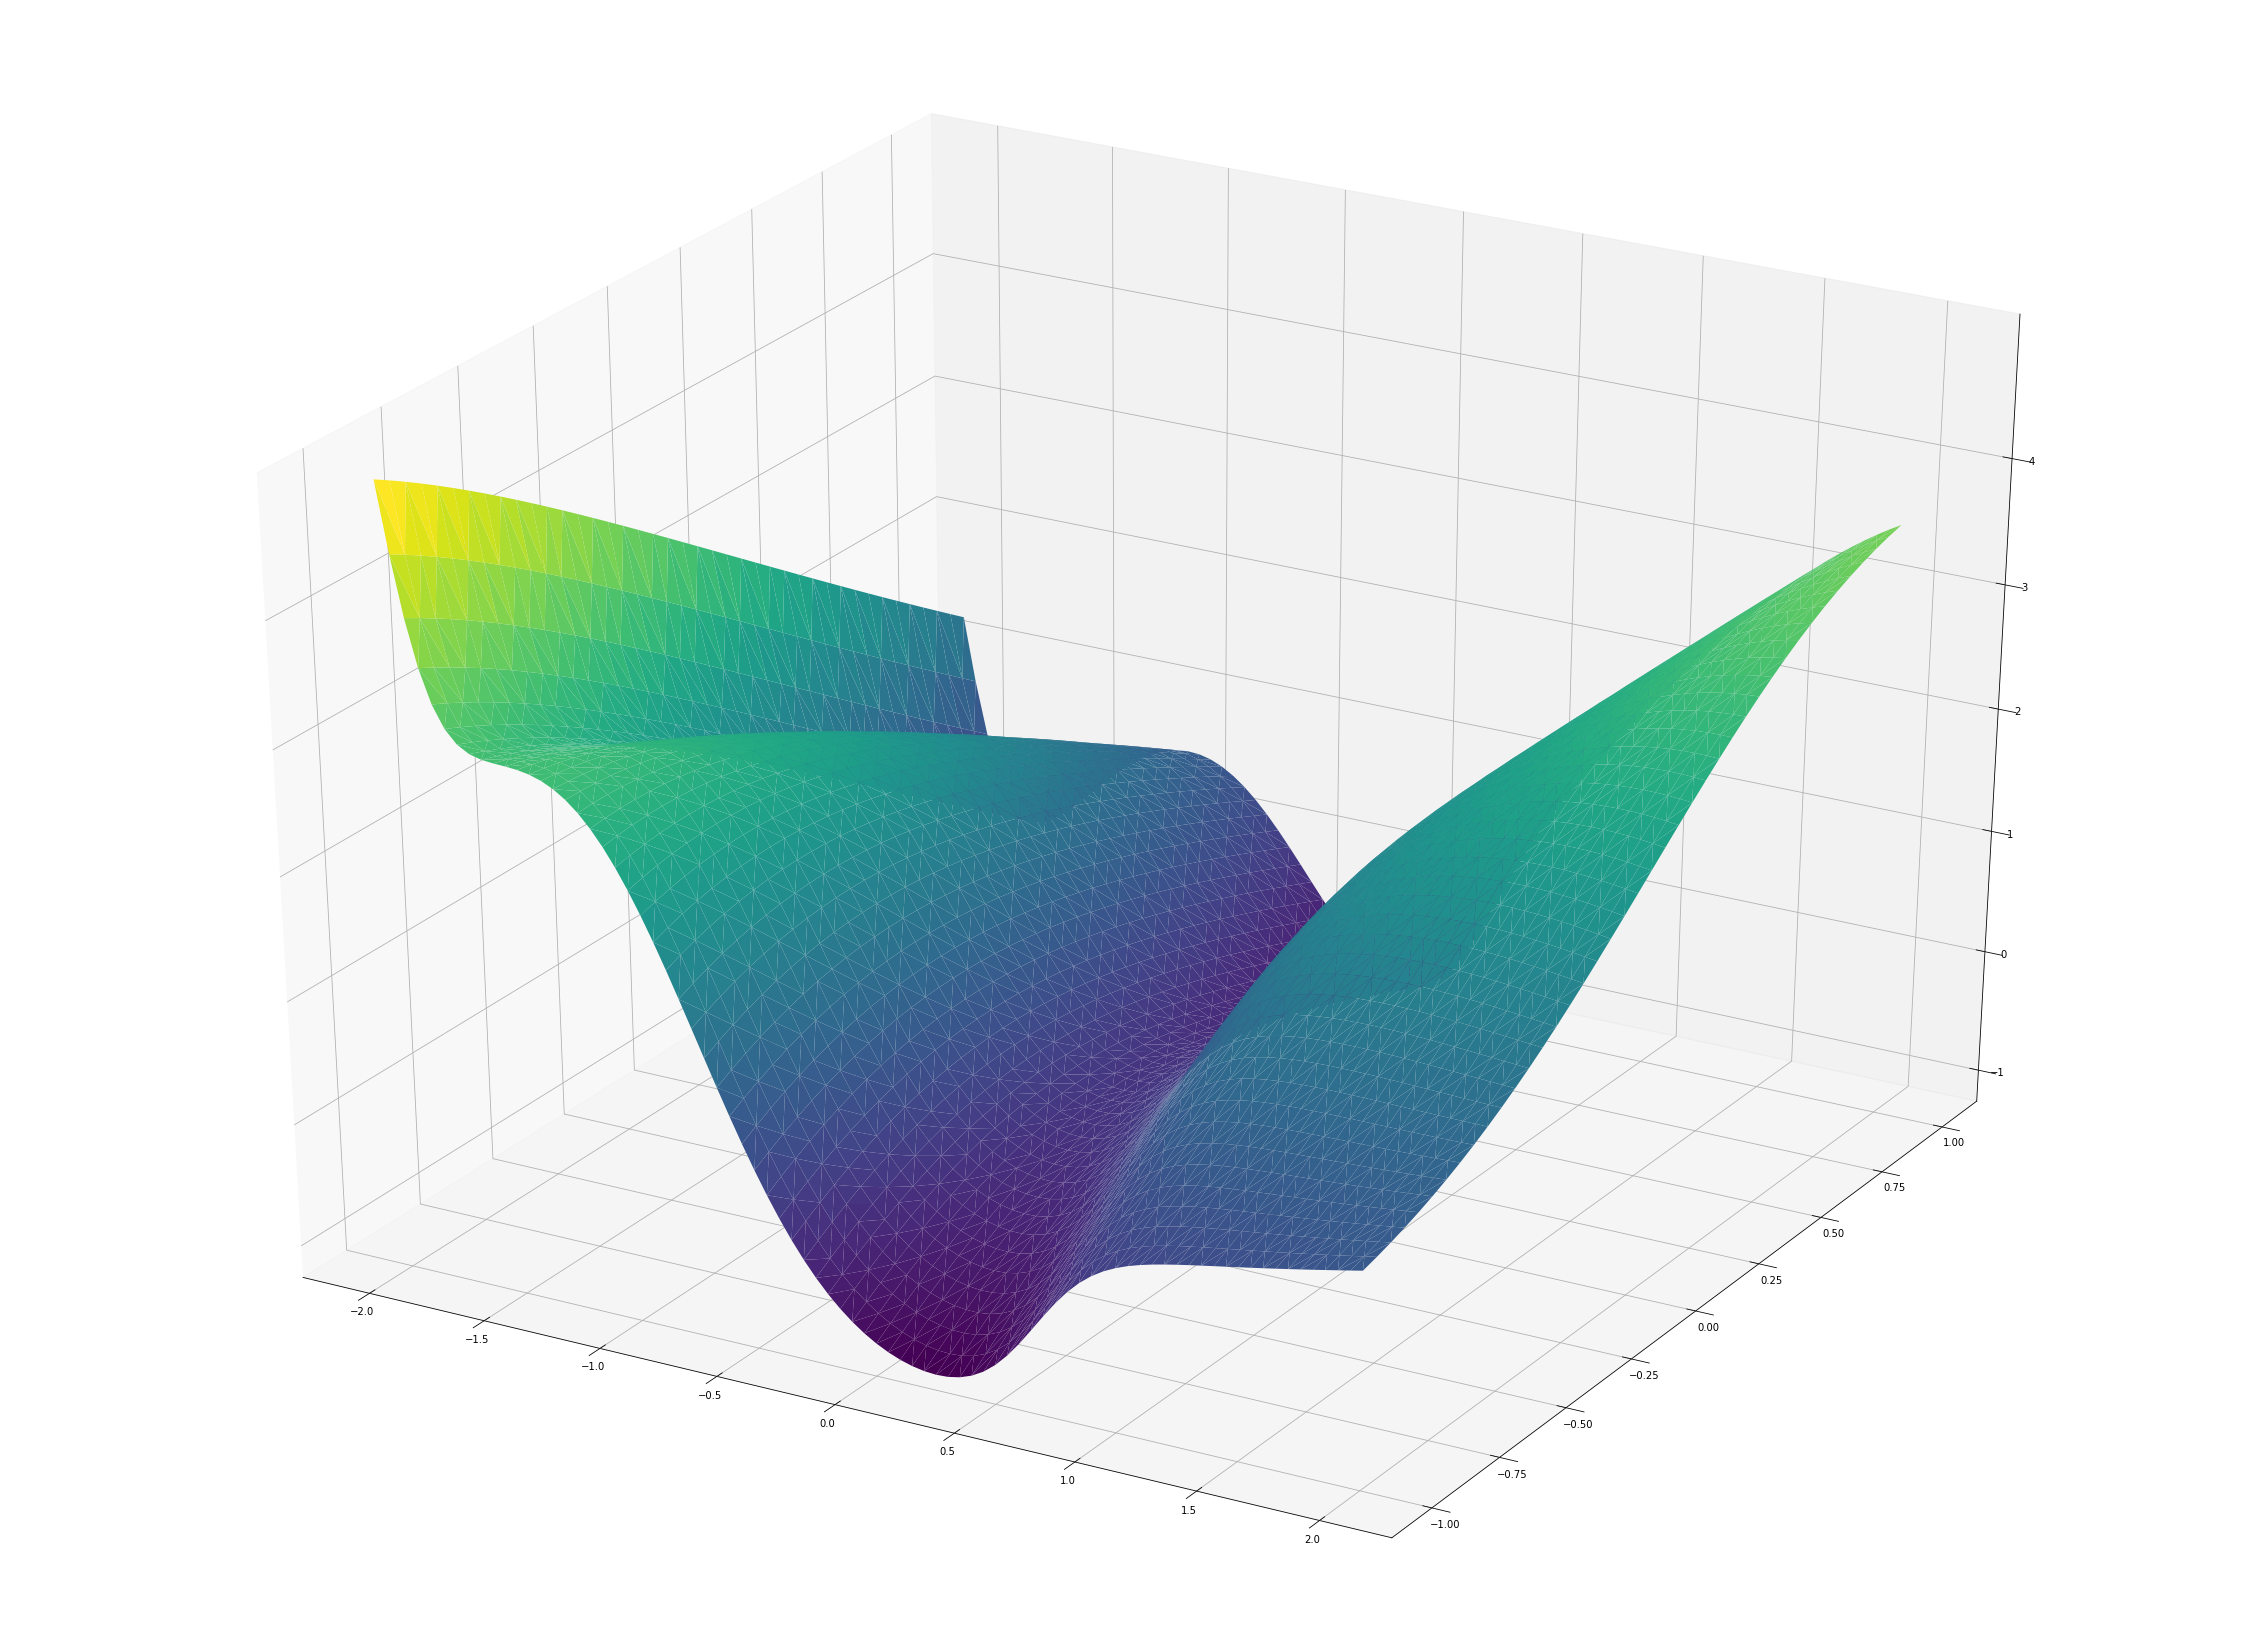

In [162]:
plotting()

In [ ]:
in_array = np.linspace(-np.pi, np.pi, 12) 
out_array = np.tanh(in_array) 
plt.plot(in_array, out_array, color = 'red', marker = "o") 
plt.title("numpy.tanh()") 
plt.xlabel("X") 
plt.ylabel("Y") 
plt.show() 